### <u>Business Understanding</u>

LendingClub is the largest online marketplace which connects borrowers and investors. In general, credit is made more affordable since LendingClub can operate at a lower cost than a traditional bank because there is no branch infrastructure, and technology is used to lower cost. The savings are passed on to the borrowers in the form of lower interest rates and to investors in the form of stable returns. Our assumption is that the data set we downloaded from Kaggle is accurate and contains all the appropriate attributes that is required for a thourough analysis. Our Data Mining goal is to identify the characteristic(s) of a given borrower that has the most relevance to keeping a loan payment current. The ability to measure this outcome will help reduce the risk to the lender and thus allow the lender to make better informed decisions when deciding whether a loan should be granted. The classifier that we are using will determine whether an applicant will turn out to be a good borrower (i.e. keep loan payments current). Additionally, we will also predict one of ten sub categories of loan status that the borrower is likely to end up with. The following are tools that will be required to perform data mining: Python, Pandas, numpy, and scikit-learn.

### <u>Data Understanding</u>

This data set contains the complete loan data for all Lending Club loans issued through year 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and the latest payment information. Each of the entries in the data set is based on the previous completed calendar quarter.

### <u>Data Preparation</u>

We began with the original data set which contained 887,379 records. Since our goal is to identify whether the loan status is in good standing or not, we had to first address whether the data set was balanced or not. Approximately 91% of the original data set contained loans in good standing and 9% were not in good standing. Since we would be performing analysis on a highly biased data set, we had to rebalance this data set so that we would not be getting unrealistic results in our models. To bring our data set to a 50/50 balance, we kept only 37,000 records from the two most common categories 'Fully Paid' and 'Current'. After the reduction in records, the final data set we used had 151,877 records.

Now that the data set is balanced, we turned our attention to dimension reduction on the 74 original attributes. We started by removing the attributes where there was insufficient data. We removed the 23 attributes where 10% or more of the data was missing. Next, we removed another 15 attributes where it was irrelevant to our analysis such as member_id, id, url, etc. Next, we imputed the fields that we can reasonably derive. We dropped the remaining attributes where we could not reasonably impute the values such as 'inq_last_6mths' (number of inquries in the last 6 months). Next, we hot-encoded all the non-numeric attributes. Finally, we performed a in-depth Principal Component Analysis and created a variance explanation visual. From this analysis, we were able to keep 12 attributes (not counting the response). The final attributes we decided to use are summarized below. Note that we had to create two DataFrames, since our classification are different for task 1 and task 2. 

In terms of the 13 attributes, we find grade_A to be the most interesting feature. It seems like if we just look at this feature, it would be an excellent indicator of whether the loan status would be in good standing. The reason for this is that in order to receive a grade A type of loan, it means the borrower must of been very fiscally responsible in the past. It is an indicator of responsiblity, at least when it comes to managing their financial affairs.

|Name   |Type   |Description   |
|---|---|---|
| loan_amnt | continuous | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. |
| funded_amnt     | continuous | The total amount committed to that loan at that point in time. |
| funded_amnt_inv | continuous | The total amount committed by investors for that loan at that point in time. |
| int_rate | continuous | Interest Rate on the loan. |
| installment | continuous | The monthly payment owed by the borrower if the loan originates. |
| out_prncp | continuous | Remaining outstanding principal for total amount funded. |
| out_prncp_inv | continuous | Remaining outstanding principal for portion of total amount funded by investors. |
| total_pymnt | continuous | Payments received to date for total amount funded. |
| total_pymnt_inv | continuous | Payments received to date for portion of total amount funded by investors. |
| total_rec_prncp | continuous | Principal received to date. |
| last_pymnt_amnt | continuous | Last payment received. |
| grade_A | hot-encoded | '1' means LC assigned 'A' to the loan grade. |
| IsLoanStatusGood | hot-encoded | Classifier for Task 1 (this attribute not in Task 2). Hot-encoded value based on original attribute loan_status. '1' means borrower is in good standing. '0' means borrower is not in good standing. |
| loan_status | encoded | Classifier for Task 2 (this attribute not in Task 1). Encoded value based on original attribute loan_status. '1' means 'Fully Paid', '2' means 'Current', '3' means 'Does not meet the credit policy. Status:Fully Paid', '4' means 'Chraged Off', '5' means 'Issued', '6' means 'Late (31-120 days)', '7' means 'In Grace Period', '8' means 'Late (16-30 days)', '9' means 'Default', '10' means 'Does not meet the credit policy. Status:Charged Off'. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from os.path import expanduser

In [2]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)

In [3]:
# Read in the original loan data set into df_o DataFrame
# Read in the balanced loan data set into df_1 DataFrame
home = expanduser('~')
data_dir = home + '/Dropbox/Personal/Jupyter/Notebooks/DataScience-SMU/MSDS7331-Data-Mining/Homework/data/'
filename_original = 'loan_original.csv'
filename_balanced = 'loan_balanced.csv'
df_o = pd.read_csv(data_dir + filename_original, low_memory=False)
df_1 = pd.read_csv(data_dir + filename_balanced, low_memory=False)

Good loans for balanced data set are: 91.45%


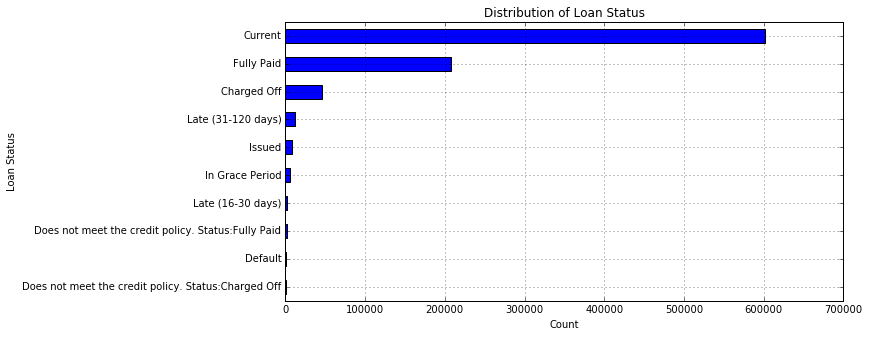

In [4]:
# Display histogram of loan_status counts from the original data set which is unbalanced and has 91/9 good/bad loan status.
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-bright')
df_o['loan_status'].value_counts(ascending=True).plot(kind='barh', title='Distribution of Loan Status', color='b', grid=True)
plt.xlabel('Count')
plt.ylabel('Loan Status')

# Calculate good/bad loan ratio
good_status = len(df_o[(df_o.loan_status == 'Fully Paid') |
                       (df_o.loan_status == 'Current') |
                       (df_o.loan_status == 'Does not meet the credit policy. Status:Fully Paid')])
all_status = len(df_o)
print('Good loans for balanced data set are: %2.2f%%' % ((float(good_status)/all_status) * 100))

Good loans for balanced data set are: 50.03%


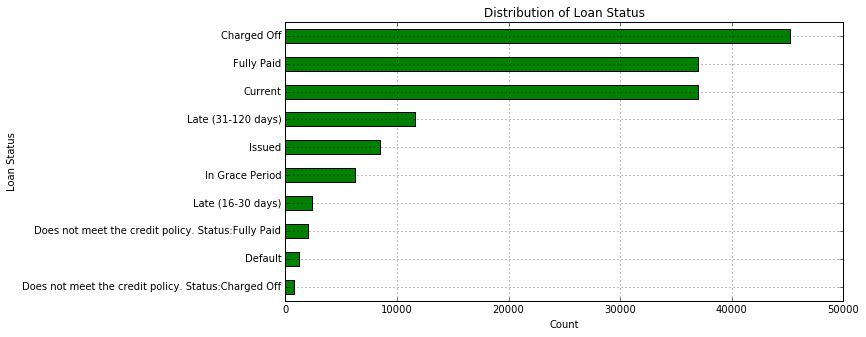

In [5]:
# Display histogram of loan_status counts after balancing data set to contain 50/50 good/bad loan status
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-bright')
df_1['loan_status'].value_counts(ascending=True).plot(kind='barh', title='Distribution of Loan Status', color='g', grid=True)
plt.xlabel('Count')
plt.ylabel('Loan Status')

# Calculate good/bad loan ratio
good_status = len(df_1[(df_1.loan_status == 'Fully Paid') |
                       (df_1.loan_status == 'Current') |
                       (df_1.loan_status == 'Does not meet the credit policy. Status:Fully Paid')])
all_status = len(df_1)
print('Good loans for balanced data set are: %2.2f%%' % ((float(good_status)/all_status) * 100))

#### Attributes Removal

We want to drop all the attributes where we have insufficient data and also data that is irrelevant to our analysis (i.e. id, member_id, url, etc.).

In [6]:
# We do a count on each attribute in the DataFrame and sort them accordingly.
df_1.count().sort_values()

verification_status_joint          70
dti_joint                          70
annual_inc_joint                   70
il_util                          7134
mths_since_rcnt_il               8016
open_acc_6m                      8228
open_il_6m                       8228
open_il_12m                      8228
open_il_24m                      8228
inq_last_12m                     8228
total_bal_il                     8228
open_rv_12m                      8228
open_rv_24m                      8228
max_bal_bc                       8228
all_util                         8228
inq_fi                           8228
total_cu_tl                      8228
desc                            24265
mths_since_last_record          25292
mths_since_last_major_derog     39192
next_pymnt_d                    69629
mths_since_last_delinq          75436
tot_cur_bal                    138877
total_rev_hi_lim               138877
tot_coll_amt                   138877
emp_title                      142239
last_pymnt_d

In [7]:
# We will drop all attributes that have less than 80,000 values (i.e. 10% or more missing).
df_1.drop([  'dti_joint',
             'verification_status_joint',
             'annual_inc_joint',
             'il_util',
             'mths_since_rcnt_il',
             'open_acc_6m',
             'open_il_6m',
             'open_il_12m',
             'open_il_24m',
             'inq_last_12m',
             'total_bal_il',
             'open_rv_12m',
             'open_rv_24m',
             'max_bal_bc',
             'all_util',
             'inq_fi',
             'total_cu_tl',
             'desc',
             'mths_since_last_record',
             'mths_since_last_major_derog',
             'mths_since_last_delinq',
             'next_pymnt_d'], axis=1, inplace=True)                

In [8]:
# We will drop all attributes that are irrelevant.
df_1.drop([  'emp_title',
             'id',
             'member_id',
             'title',
             'url',
             'initial_list_status',
             'addr_state',
             'zip_code',
             'verification_status',
             'home_ownership',
             'pymnt_plan',
             'issue_d',
             'earliest_cr_line',
             'last_pymnt_d',
             'last_credit_pull_d'], axis=1, inplace=True)

In [9]:
df_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B3,5 years,71000.0,Fully Paid,credit_card,15.35,0.0,0.0,6.0,0.0,18553.0,98.7,31.0,0.0,0.0,10897.010000,10897.01,10000.0,897.01,0.0,0.0,0.0,7908.11,0.0,1.0,INDIVIDUAL,0.0,0.0,28798.0,18800.0
1,35000.0,35000.0,35000.0,60 months,15.61,843.90,C,C5,10+ years,140000.0,Fully Paid,debt_consolidation,16.06,1.0,2.0,22.0,0.0,7218.0,10.7,63.0,0.0,0.0,38078.551845,38078.55,35000.0,3078.55,0.0,0.0,0.0,33015.15,0.0,1.0,INDIVIDUAL,0.0,0.0,283323.0,67700.0
2,17025.0,17025.0,17025.0,36 months,14.16,583.20,C,C2,< 1 year,60000.0,Fully Paid,credit_card,8.68,0.0,0.0,5.0,0.0,7150.0,64.4,10.0,0.0,0.0,19687.320000,19687.32,17025.0,2662.32,0.0,0.0,0.0,10939.32,0.0,1.0,INDIVIDUAL,0.0,0.0,192235.0,11100.0
3,3500.0,3500.0,3500.0,36 months,14.64,120.72,C,C3,10+ years,34000.0,Fully Paid,debt_consolidation,22.20,0.0,1.0,4.0,1.0,1757.0,65.0,20.0,0.0,0.0,4143.460000,4143.46,3500.0,643.46,0.0,0.0,0.0,1970.50,0.0,1.0,INDIVIDUAL,0.0,0.0,5965.0,2700.0
4,10800.0,10800.0,10800.0,36 months,11.99,358.67,B,B3,6 years,70000.0,Fully Paid,debt_consolidation,8.71,1.0,0.0,5.0,0.0,26524.0,85.6,23.0,0.0,0.0,11972.150000,11972.15,10800.0,1172.15,0.0,0.0,0.0,8026.78,0.0,1.0,INDIVIDUAL,0.0,0.0,230488.0,31000.0


#### Imputation of Data

We want to impute the values that we can reasonably derive. We will ignore imputation of attributes such as where we can not use any reasonable means to estimate that value.

In [10]:
# Impute borrower's average annual income.
# We have 4 values of annual income that is missing.
# We impute with the median of all the annual incomes, since there are outliers.
# print df_1.loc[pd.isnull(df_1.annual_inc), 'annual_inc']
df_1.loc[pd.isnull(df_1.annual_inc), 'annual_inc'] = df_1['annual_inc'].median()

# Impute borrower's that are deliquent 2 years.
# There are 29 rows where delinquent 2 years is NaN.
# We will impute this value to zero since the overwhelming majority of the borrowers do not have any deliquency on their record.
# Also, we do not want to use the average here since these are discrete integer values.
# Hypothetically, if we are interested in using this attribute as a response variable in the future, we want to only have discrete integer values.
# Additionally, since the attribute is highly skewed, we also do not want to use the median value since 93.56% of the values are 0 or 1.
# print df_1['delinq_2yrs'].value_counts()
# print len(df_1.loc[pd.isnull(df_1.delinq_2yrs), 'delinq_2yrs'])
df_1.loc[pd.isnull(df_1.delinq_2yrs), 'delinq_2yrs'] = 0

# Impute borrower's total revolving high limit.
# Since there are only a few outliers, and the sample size is large, we will impute with the mean.
df_1.loc[pd.isnull(df_1.total_rev_hi_lim), 'total_rev_hi_lim'] = df_1['total_rev_hi_lim'].mean()

# Impute borrower's total collection amount.
# Since there are only a few outliers, and the sample size is large, we will impute with the mean.
df_1.loc[pd.isnull(df_1.tot_coll_amt), 'tot_coll_amt'] = df_1['tot_coll_amt'].mean()

# Impute borrower's total current balance.
# Since there are only a few outliers, and the sample size is large, we will impute with the mean.
df_1.loc[pd.isnull(df_1.tot_cur_bal), 'tot_cur_bal'] = df_1['tot_cur_bal'].mean()

# Delete the remaining records that have NaN values
df_1.dropna(axis=0, inplace=True)

#### One-Hot Encoding

We want to hot-encode the values that are categorical for our analysis.

In [11]:
# Hot encode borrower's term
tmp_df = pd.get_dummies(df_1.term,prefix='term')
df_1 = pd.concat((df_1,tmp_df),axis=1)

# Hot encode borrower's grade
tmp_df = pd.get_dummies(df_1.grade,prefix='grade')
df_1 = pd.concat((df_1,tmp_df),axis=1)

# Hot encode borrower's sub_grade
tmp_df = pd.get_dummies(df_1.sub_grade,prefix='sub_grade')
df_1 = pd.concat((df_1,tmp_df),axis=1)

# Hot encode borrower's emp_length
tmp_df = pd.get_dummies(df_1.emp_length,prefix='emp_length')
df_1 = pd.concat((df_1,tmp_df),axis=1)

# Hot encode borrower's purpose
tmp_df = pd.get_dummies(df_1.purpose,prefix='purpose')
df_1 = pd.concat((df_1,tmp_df),axis=1)

# Hot encode borrower's application_type
tmp_df = pd.get_dummies(df_1.application_type,prefix='application_type')
df_1 = pd.concat((df_1,tmp_df),axis=1)

# Save loan_status since we are going to temporarily remove it for PCA analysis
s_loan_status = df_1['loan_status']

#### Create Our Classification Attribute

We would like to predict whether the loan is in good standing. However, there are actually 10 different subcategories. We will separate them out accordingly:  

<b>Value 1:  </b>
 - Fully Paid   
 - Current  
 - Does not meet the credit policy. Status: Fully Paid    
 
<b>Value 0:  </b>
 - Charged Off  
 - Default  
 - In Grace Period
 - Does not meet the credit policy. Status: Charged Off  
 - Issued, Late (16-30 days)  
 - Late (31-120 days)  

In [12]:
# drop attributes that we hot-encoded
df_1.drop(['loan_status',
           'term',
           'grade',
           'sub_grade',
           'emp_length',
           'purpose',
           'application_type'], axis=1, inplace=True)

#### PCA Dimensionality Reduction

We would like to use PCA in order to determine which attributes are relevant to our model.

In [13]:
# now let's use PCA to systematically find the most significant attributes from the data set
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# we grab the values into a variable
X = df_1.values

# we standardize the attribute values since they are not on the same scale 
X_std = StandardScaler().fit_transform(X)

# we will use 5 principal components
pca = PCA(n_components=5)

# fit data and then transform it
X_pca = pca.fit(X_std).transform(X_std)

# print the components
np.set_printoptions(threshold=np.inf)
print 'pca:', pca.components_

pca: [[  3.41723390e-01   3.41817378e-01   3.40609750e-01   1.20835559e-01
    3.18609649e-01   1.42974741e-01   2.73333786e-02   7.70122630e-03
    3.47423971e-03   1.03751283e-01  -3.38769107e-02   1.46875842e-01
    5.35507044e-02   1.14838735e-01   1.16994898e-01   1.16991125e-01
    2.61453252e-01   2.61912860e-01   2.11181873e-01   2.43505471e-01
    3.04644662e-02   6.59186934e-02   5.22332349e-02   1.56420633e-01
   -6.71683878e-03   0.00000000e+00   7.28052115e-03  -7.64736195e-03
    1.44681804e-01   1.47000269e-01  -1.87648376e-01   1.87648376e-01
   -3.27615529e-02  -6.01495118e-02  -3.18098449e-02   1.81760244e-02
    7.75467224e-02   6.91981249e-02   4.45926149e-02  -9.52881790e-03
   -1.47350377e-02  -1.22267438e-02  -1.63173438e-02  -1.62646045e-02
   -2.06605950e-02  -2.38688410e-02  -2.43185218e-02  -2.20070523e-02
   -2.91911026e-02  -2.07468072e-02  -1.97453927e-02  -1.14846494e-02
   -4.87557162e-03  -4.50536422e-03   8.48218951e-05   4.00612349e-04
    4.99571899e

#### Plot Principal Components and Cumulative Variance Ratio

Eigenvalues in descending order:
7.39970133178
4.13230452739
3.46635323237
2.42433851011
2.29554554148


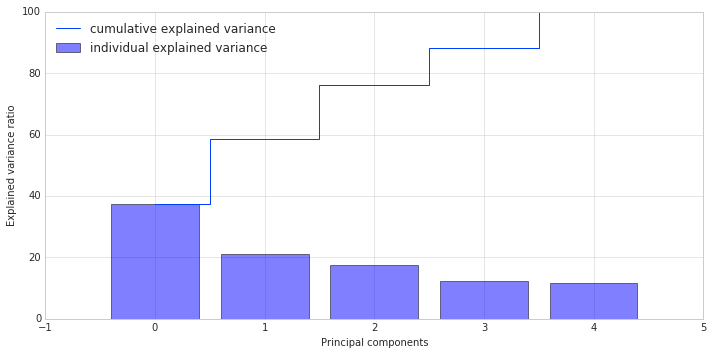

In [14]:
mean_vec = np.mean(X_pca, axis=0)
cov_mat = (X_pca - mean_vec).T.dot((X_pca - mean_vec)) / (X_pca.shape[0]-1)
cov_mat = np.cov(X_pca.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    plt.bar(range(5),
            var_exp,
            alpha=0.5,
            align='center',
            label='individual explained variance')
    plt.step(range(5),
             cum_var_exp,
             where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

##### Based on the plot above, it clearly shows about 77% of the variance is explained by the first 3 principal components. Therefore, we will retain only the first 3 principal components.
- Principal Component 1 [~38%]    
- Principal Component 2 [~21%]  
- Principal Component 3 [~18%]  

#### Attributes that are the most important    
To determine which attributes we are going to save from each principal component, we selected the attributes with the largest eigenvector. These are the most important attributes. For the sake of brevity, we only display the eigenvectors for Principal Component 3.
- <b>Principal Component 1:</b> The overall theme of Principal Component 1 relates to the size of the loan given to the borrower. The funded amount (funded_amnt_inv and funded_amnt) is the total amount committed by the investors and LendingClub, which is usually the size of the loan amount. The installment is the monthly payment that the borrow has to pay.  
- <b>Principal Component 2:</b> The overall theme of Principal Component 2 relates to the quality of the borrower. The int_rate attribute is the interest rate that is charged on the loan. Grade "A" significantly indicates that there is high likelihood that the loan will remain in a good status.
- <b>Principal Component 3:</b> The overall theme of Principal Component 3 revolves around the remaining principal of the loan. Since both LendingClub and its investors lend money to the borrowers, these attributes reflect this fact. Total received principal (total_rec_prncp) is the principal received to-date. The outstanding principal (out_prncp_inv and out_prncp) is the remaining outstanding principal owed to the investor and LendingClub by the borrower. The total payment (total_pymnt_inv and total_pymnt) is the remaining outstanding payments (principal+interest) owed to the investor and LendingClub by the borrower.

In [15]:
sa = pd.Series(list(df_1.columns.values))
s0 = pd.Series(pca.components_[0])
s1 = pd.Series(pca.components_[1])
s2 = pd.Series(pca.components_[2])

# Principal Component #1
# Attributes selected:
#    loan_amnt
#    funded_amnt
#    funded_amnt_inv
#    installment
df_PC1 = pd.DataFrame(dict(sa=sa, s0=s0)).reset_index()
df_PC1.sort_values(by='s0', ascending=False)

# Principal Component #2
# Attributes selected:
#    grade_A
#    int_rate
df_PC2 = pd.DataFrame(dict(sa=sa, s1=s1)).reset_index()
df_PC2.sort_values(by='s1', ascending=False)

# Principal Component #3
# Attributes selected:
#    total_rec_prncp
#    total_pymnt
#    total_pymnt_inv
#    last_pymnt_amnt
#    out_prncp_inv
#    out_prncp
df_PC3 = pd.DataFrame(dict(sa=sa, s2=s2)).reset_index()
df_PC3.sort_values(by='s2', ascending=False)

,index,s2,sa
18,18,0.311010,total_rec_prncp
23,23,0.310884,last_pymnt_amnt
16,16,0.303851,total_pymnt
17,17,0.300858,total_pymnt_inv
3,3,0.159193,int_rate
8,8,0.093515,inq_last_6mths
21,21,0.085133,recoveries
22,22,0.074268,collection_recovery_fee
35,35,0.058300,grade_D
37,37,0.051164,grade_F


In [16]:
# drop all attributes that are not significant based on our PCA analysis above.
df_1.drop([ 'annual_inc',
            'dti',
            'delinq_2yrs',
            'inq_last_6mths',
            'open_acc',
            'pub_rec',
            'revol_bal',
            'revol_util',
            'total_acc',
            'total_rec_int',
            'total_rec_late_fee',
            'recoveries',
            'collection_recovery_fee',
            'collections_12_mths_ex_med',
            'policy_code',
            'acc_now_delinq',
            'tot_coll_amt',
            'tot_cur_bal',
            'total_rev_hi_lim',
            'term_ 36 months',
            'term_ 60 months',
            'grade_B',
            'grade_C',
            'grade_D',
            'grade_E',
            'grade_F',
            'grade_G',
            'sub_grade_A1',
             'sub_grade_A2',
             'sub_grade_A3',
             'sub_grade_A4',
             'sub_grade_A5',
             'sub_grade_B1',
             'sub_grade_B2',
             'sub_grade_B3',
             'sub_grade_B4',
             'sub_grade_B5',
             'sub_grade_C1',
             'sub_grade_C2',
             'sub_grade_C3',
             'sub_grade_C4',
             'sub_grade_C5',
             'sub_grade_D1',
             'sub_grade_D2',
             'sub_grade_D3',
             'sub_grade_D4',
             'sub_grade_D5',
             'sub_grade_E1',
             'sub_grade_E2',
             'sub_grade_E3',
             'sub_grade_E4',
             'sub_grade_E5',
             'sub_grade_F1',
             'sub_grade_F2',
             'sub_grade_F3',
             'sub_grade_F4',
             'sub_grade_F5',
             'sub_grade_G1',
             'sub_grade_G2',
             'sub_grade_G3',
             'sub_grade_G4',
             'sub_grade_G5',
             'emp_length_1 year',
             'emp_length_10+ years',
             'emp_length_2 years',
             'emp_length_3 years',
             'emp_length_4 years',
             'emp_length_5 years',
             'emp_length_6 years',
             'emp_length_7 years',
             'emp_length_8 years',
             'emp_length_9 years',
             'emp_length_< 1 year',
             'emp_length_n/a',
             'purpose_car',
             'purpose_credit_card',
             'purpose_debt_consolidation',
             'purpose_educational',
             'purpose_home_improvement',
             'purpose_house',
             'purpose_major_purchase',
             'purpose_medical',
             'purpose_moving',
             'purpose_other',
             'purpose_renewable_energy',
             'purpose_small_business',
             'purpose_vacation',
             'purpose_wedding',
             'application_type_INDIVIDUAL',
             'application_type_JOINT'], axis=1, inplace=True)

In [17]:
# put back the loan_status attribute since we dropped it earlier to do PCA analysis
df_1['loan_status'] = s_loan_status

# make a copy of df_1 for Task #2
df_2 = df_1.copy()

In [18]:
# Task #1
# encode the loan_status to 0 or 1 so that we can perform binomial classification analysis
# added the IsLoanStatusGood attribute by renaming loan_status
df_1 = df_1.replace(to_replace=['Fully Paid',
                                'Current',
                                'Does not meet the credit policy. Status:Fully Paid'], value=1)
df_1 = df_1.replace(to_replace=['Charged Off',
                                'Issued',
                                'Late (31-120 days)',
                                'In Grace Period',
                                'Late (16-30 days)',
                                'Default',
                                'Does not meet the credit policy. Status:Charged Off'], value=0)
df_1 = df_1.rename(columns={'loan_status':'IsLoanStatusGood'})

In [19]:
# Task #2
# encode the loan_status attribute to a number so that we can perform multinomial classification analysis
df_2 = df_2.replace(to_replace='Fully Paid', value=1)
df_2 = df_2.replace(to_replace='Current', value=2)
df_2 = df_2.replace(to_replace='Does not meet the credit policy. Status:Fully Paid', value=3)
df_2 = df_2.replace(to_replace='Charged Off', value=4)
df_2 = df_2.replace(to_replace='Issued', value=5)
df_2 = df_2.replace(to_replace='Late (31-120 days)', value=6)
df_2 = df_2.replace(to_replace='In Grace Period', value=7)
df_2 = df_2.replace(to_replace='Late (16-30 days)', value=8)
df_2 = df_2.replace(to_replace='Default', value=9)
df_2 = df_2.replace(to_replace='Does not meet the credit policy. Status:Charged Off', value=10)

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151675 entries, 0 to 151876
Data columns (total 13 columns):
loan_amnt           151675 non-null float64
funded_amnt         151675 non-null float64
funded_amnt_inv     151675 non-null float64
int_rate            151675 non-null float64
installment         151675 non-null float64
out_prncp           151675 non-null float64
out_prncp_inv       151675 non-null float64
total_pymnt         151675 non-null float64
total_pymnt_inv     151675 non-null float64
total_rec_prncp     151675 non-null float64
last_pymnt_amnt     151675 non-null float64
grade_A             151675 non-null float64
IsLoanStatusGood    151675 non-null int64
dtypes: float64(12), int64(1)
memory usage: 16.2 MB


### <u>Modeling and Evaluation</u>

In [21]:
import numpy as np
from sklearn import metrics as mt

# Task #1 Classification
# this DataFrame has only 13 attributes after we reduced the dimensions using PCA
if 'IsLoanStatusGood' in df_1:
    y = df_1['IsLoanStatusGood'].values
    del df_1['IsLoanStatusGood']
    X = df_1.values

# Task #2 Classification
# this DataFrame has only 13 attributes after we reduced the dimensions using PCA
if 'loan_status' in df_2:
    y1 = df_2['loan_status'].values
    del df_2['loan_status']
    X1 = df_2.values

#### Task 1 and 2: Cross Validation Method

- The main cross validation method we used is stratified 10-fold validation. Although this is an intensive method relative to other cross-validation methods, it is the best method for randomizing data. In addition, stratification is useful to address the biases of over or under representation of classes in classification algorithms.  
- However, due to unreasonable time constraint, we had to reduce the training and test data on the SVM classifier. We therefore went with Shuffle Split cross validation method for that model.

#### Task 1: K-Nearest Neighbors Classification

- We first use an iterative approach to discover the optimal K parameter for the K-Nearest Neighbor Classifier. We run through a range of values from 1 to 21, incrementing by 2 each time to find where the accuracy levels out. We want to make sure the numbers we try are odd, since we want to avoid cases where there is a tie between the classifications. From the graph we plotted, we ended up choosing K=5 for our model.  
- The advantage of using KNN is simplicity, since there is only one-parameter to tweak. It is also effective with large data sets.   
- Although the computation cost for KNN is high, we are not concerned since we have reduced the dimensions to only 12 from our PCA analysis.

Neighbors: 1, Accuracy: 0.952253
Neighbors: 3, Accuracy: 0.959407
Neighbors: 5, Accuracy: 0.959927
Neighbors: 7, Accuracy: 0.959426
Neighbors: 9, Accuracy: 0.958965
Neighbors: 11, Accuracy: 0.958154
Neighbors: 13, Accuracy: 0.957277
Neighbors: 15, Accuracy: 0.956703
Neighbors: 17, Accuracy: 0.956044
Neighbors: 19, Accuracy: 0.955378


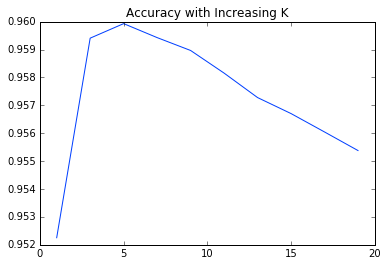

In [22]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import pylab as pl

# create Stratified k-fold cross validation iterator
cv_object = StratifiedKFold(y, n_folds=10)

# we will fill this with predictions
y_hat = np.zeros(y.shape)

# now iterate through and get predictions, saved to the correct row in yhat
results = []
for n in range(1, 21, 2):
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    for train, test in cv_object:
        knn_clf.fit(X[train], y[train])
        y_hat[test] = knn_clf.predict(X[test])
    accuracy = mt.accuracy_score(y, y_hat)
    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)
    results.append([n, accuracy])
results = pd.DataFrame(results, columns=["n", "accuracy"])
pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

From the graph, we determined the optimal K to be 5. For values greater than 5, the classifier is likely to be overfitting, or paying too much attention to the noise in the data. We can now run the model with K=5 and report on the accuracy, precision, and recall. 

In [23]:
# we determined optimal K to use is 5
knn_clf = KNeighborsClassifier(n_neighbors=5)
for train, test in cv_object:
    knn_clf.fit(X[train], y[train])
    y_hat[test] = knn_clf.predict(X[test])

# performance reporting
print
print "Classification report for %s" % knn_clf
print
print mt.classification_report(y, y_hat)
print "Confusion Matrix"
print mt.confusion_matrix(y, y_hat)
print
print "Accuracy: %.2f%%" % (mt.accuracy_score(y, y_hat) * 100)


Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

             precision    recall  f1-score   support

          0       0.97      0.95      0.96     75796
          1       0.95      0.97      0.96     75879

avg / total       0.96      0.96      0.96    151675

Confusion Matrix
[[72003  3793]
 [ 2285 73594]]

Accuracy: 95.99%


For K-Nearest Neighbor model, we were able to achieve an accuracy of 96%. The most important factor, however, is we have an average precision of 96% and average recall of 96%. This indicates to us that our model can determine whether a loan will remain in good standing with a fair amount of accuracy and also not allowing unqualified borrowers to get a loan. This protects the risk and downside of the business as this means that we are giving loans to the borrowers that will most likely remain in a good standing.

#### Task 1: Decision Tree Classification

- We first use a similar iterative approach to discover the optimal min_samples_split parameter for the Decision Tree Classifier. We run through a range of values from 10 to 100, incrementing by 10 each time to find where the accuracy and the log loss levels fall on the graphs.

In [24]:
# from the tutorial: http://www.kaggle.com/c/datasciencebowl/details/tutorial 
def multiclass_log_loss(y_true, y_pred, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss

    Parameters
    ----------
    y_true : array, shape = [n_samples]
            true class, integers in [0, n_classes - 1)
    y_pred : array, shape = [n_samples, n_classes]

    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)

    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]

    actual = np.zeros(y_pred.shape)
    n_samples = actual.shape[0]
    actual[np.arange(n_samples), y_true.astype(int)] = 1
    vectsum = np.sum(actual * np.log(predictions))
    loss = -1.0 / n_samples * vectsum
    return loss

Minimum Samples Split: 10, Accuracy: 0.953420
Minimum Samples Split: 10, Log Loss: 3.575073
Minimum Samples Split: 20, Accuracy: 0.951759
Minimum Samples Split: 20, Log Loss: 3.064351
Minimum Samples Split: 30, Accuracy: 0.950302
Minimum Samples Split: 30, Log Loss: 2.607420
Minimum Samples Split: 40, Accuracy: 0.949873
Minimum Samples Split: 40, Log Loss: 2.256079
Minimum Samples Split: 50, Accuracy: 0.948858
Minimum Samples Split: 50, Log Loss: 2.133758
Minimum Samples Split: 60, Accuracy: 0.948165
Minimum Samples Split: 60, Log Loss: 2.032319
Minimum Samples Split: 70, Accuracy: 0.947262
Minimum Samples Split: 70, Log Loss: 1.892920
Minimum Samples Split: 80, Accuracy: 0.946774
Minimum Samples Split: 80, Log Loss: 1.819238
Minimum Samples Split: 90, Accuracy: 0.944981
Minimum Samples Split: 90, Log Loss: 1.766828
Minimum Samples Split: 100, Accuracy: 0.944651
Minimum Samples Split: 100, Log Loss: 1.573873


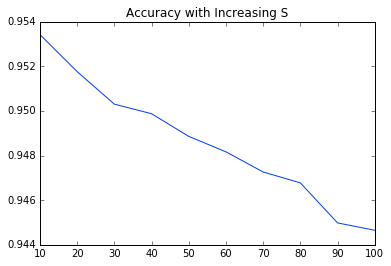

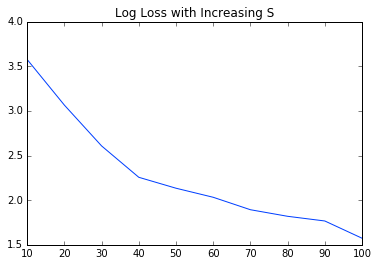

In [25]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# create Stratified k-fold cross validation iterator
cv_object = StratifiedKFold(y, n_folds=10)

# we will fill this with predictions
y_hat = np.zeros(y.shape)

# now iterate through and get predictions, saved to the correct row in yhat
a_results = []
l_results = []
for s in range(10, 105, 10):
    dt_clf = DecisionTreeClassifier(min_samples_split=s)
    for train, test in cv_object:
        dt_clf.fit(X[train], y[train])
        y_hat[test] = dt_clf.predict(X[test])
    accuracy = mt.accuracy_score(y, y_hat)
    class_probabilities = dt_clf.predict_proba(X[test])
    log_loss = multiclass_log_loss(y[test], class_probabilities)
    print "Minimum Samples Split: %d, Accuracy: %3f" % (s, accuracy)
    print "Minimum Samples Split: %d, Log Loss: %f" % (s, log_loss)
    a_results.append([s, accuracy])
    l_results.append([s, log_loss])
a_results = pd.DataFrame(a_results, columns=["s", "accuracy"])
l_results = pd.DataFrame(l_results, columns=["s", "log_loss"])
pl.plot(a_results.s, a_results.accuracy)
pl.title("Accuracy with Increasing S")
pl.show()

pl.plot(l_results.s, l_results.log_loss)
pl.title("Log Loss with Increasing S")
pl.show()

From the Accuracy graph, we note that there is some fluctuation in accuracy depending on minimum samples split used. We also note that the Log Loss is constantly decreasing as we increase minimum samples split. However, we would like to have a balance between accuracy and log loss. Therefore, we decided to go with minimum samples split equal to 80. We can now run the model with minimum samples split equal to 80 and report on the accuracy, precision, and recall. 

In [26]:
# we determined optimal S to use is 
dt_clf = DecisionTreeClassifier(min_samples_split=80)
for train, test in cv_object:
    dt_clf.fit(X[train], y[train])
    y_hat[test] = dt_clf.predict(X[test])

# performance reporting
class_probabilities = dt_clf.predict_proba(X[test])
print
print "Classification report for %s" % dt_clf
print
print mt.classification_report(y, y_hat)
print "Confusion Matrix"
print mt.confusion_matrix(y, y_hat)
print
print "Accuracy: %.2f%%" % (mt.accuracy_score(y, y_hat) * 100)
print
print "Log Loss: %f" % multiclass_log_loss(y[test], class_probabilities)


Classification report for DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=80, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

             precision    recall  f1-score   support

          0       0.95      0.94      0.95     75796
          1       0.94      0.95      0.95     75879

avg / total       0.95      0.95      0.95    151675

Confusion Matrix
[[71176  4620]
 [ 3498 72381]]

Accuracy: 94.65%

Log Loss: 1.792885


For Decision Tree model, we were able to achieve an accuracy of 95%. The most important factor, however, is we have an average precision of 95% and average recall of 95%. This indicates to us that our model can determine whether a loan will remain in good standing with a fair amount of accuracy and it is also not allowing unqualified borrowers to get a loan. This protects the risk and downside of the business as this means that we are giving loans to the borrowers that will most likely remain in a good standing.

#### Task 1: Support Vector Machine Classification

- Due to unreasonable time constraint, we had to limit the training and test data.  
- Adjusting the Cost to 1.0 resulted in the most accurate model at 80%. However, this was not significantly better than varying the Cost between 0.01 and 10. The time utilized for training and fitting the data increased substantially as we increased the Cost factor from 0.01 to 10. 

In [27]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# take a timestamp at the beginning of the SVM process
t1 = time.clock()

num_cv_iterations = 3
num_instances = len(y)

cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         train_size = 0.01,
                         test_size = 0.1)

# we will fill this with predictions
y_hat = np.zeros(y.shape)

for train, test in cv_object: 
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]

# train the model
svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_clf.fit(X_train, y_train)

# get the test set predictions
y_hat = svm_clf.predict(X_test)

# performance reporting
print
print "Classification report for %s" % svm_clf
print
print mt.classification_report(y_test, y_hat)
print "Confusion Matrix"
print mt.confusion_matrix(y_test, y_hat)
print
print "Accuracy: %.2f%%" % (mt.accuracy_score(y_test, y_hat) * 100)

# take a timestamp at the end of the SVM process
t2 = time.clock()
print
print('SVM ran in: %.2f seconds' % (t2-t1))


Classification report for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

             precision    recall  f1-score   support

          0       0.89      0.81      0.85      7538
          1       0.83      0.90      0.86      7630

avg / total       0.86      0.85      0.85     15168

Confusion Matrix
[[6098 1440]
 [ 780 6850]]

Accuracy: 85.36%

SVM ran in: 214.05 seconds


For Support Vector Machine model, we were able to achieve an overall accuracy of 80%. The most important factor, however, is we have an average precision of 80% and average recall of 80%. This indicates to us that our model can determine whether a loan will remain in good standing with a fair amount of accuracy and also not allowing unqualified borrowers to get a loan. This protects the risk and downside of the business as this means that we are giving loans to the borrowers that will most likely remain in a good standing. Due to time constraints, we were not able to run with a larger training size and therefore, it probably affected our accuracy.

#### Task 2: K-Nearest Neighbors Classification

- We first use an iterative approach to discover the optimal K parameter for the K-Nearest Neighbor Classifier. We run through a range of values from 1 to 21, incrementing by 2 each time to find where the accuracy levels out. We want to make sure the numbers we try are odd, since we want to avoid cases where there is a tie between the classifications. From the graph we plotted, we ended up choosing K=5 for our model.  
- The advantage of using KNN is simplicity, since there is only one-parameter to tweak. It is also effective with large data sets.   
- Although the computation cost for KNN is high, we are not concerned since we have reduced the dimensions to only 12 from our PCA analysis.

Neighbors: 1, Accuracy: 0.853021
Neighbors: 3, Accuracy: 0.874099
Neighbors: 5, Accuracy: 0.874119
Neighbors: 7, Accuracy: 0.873717
Neighbors: 9, Accuracy: 0.873479
Neighbors: 11, Accuracy: 0.873855
Neighbors: 13, Accuracy: 0.873710
Neighbors: 15, Accuracy: 0.873334
Neighbors: 17, Accuracy: 0.873361
Neighbors: 19, Accuracy: 0.873288


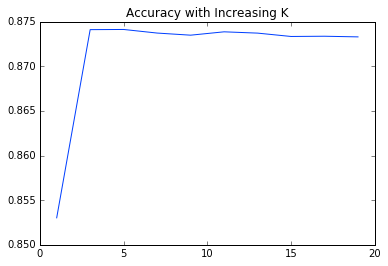

In [27]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import pylab as pl

# create Stratified k-fold cross validation iterator
cv_object = StratifiedKFold(y1, n_folds=10)

# we will fill this with predictions
y_hat = np.zeros(y1.shape)

# now iterate through and get predictions, saved to the correct row in yhat
results = []
for n in range(1, 21, 2):
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    for train, test in cv_object:
        knn_clf.fit(X1[train], y1[train])
        y_hat[test] = knn_clf.predict(X1[test])
    accuracy = mt.accuracy_score(y1, y_hat)
    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)
    results.append([n, accuracy])
results = pd.DataFrame(results, columns=["n", "accuracy"])
pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

From the graph, we determined the optimal K to be 5. For values greater than 5, the classifier is likely to be overfitting, or paying too much attention to the noise in the data. We can now run the model with K=5 and report on the accuracy, precision, and recall. 

In [29]:
# take a timestamp at the beginning of the KNN process
t1 = time.clock()

# we determined optimal K to use is 5
knn_clf = KNeighborsClassifier(n_neighbors=5)
for train, test in cv_object:
    knn_clf.fit(X1[train], y1[train])
    y_hat[test] = knn_clf.predict(X1[test])

# performance reporting
print
print "Classification report for %s" % knn_clf
print
print mt.classification_report(y1, y_hat)
print "Confusion Matrix"
print mt.confusion_matrix(y1, y_hat)
print
print "Accuracy: %.2f%%" % (mt.accuracy_score(y1, y_hat) * 100)

# take a timestamp at the end of the MLR process
t2 = time.clock()
print
print('K-Nearest Neighbor ran in: %.2f seconds' % (t2-t1))


Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

             precision    recall  f1-score   support

          1       0.97      1.00      0.99     36979
          2       0.90      0.97      0.94     36986
          3       0.78      0.67      0.72      1914
          4       0.98      0.99      0.98     45195
          5       0.95      1.00      0.97      8457
          6       0.41      0.42      0.41     11582
          7       0.10      0.07      0.08      6251
          8       0.03      0.01      0.01      2355
          9       0.01      0.00      0.00      1218
         10       0.21      0.13      0.16       738

avg / total       0.85      0.87      0.86    151675

Confusion Matrix
[[36842     0   116    21     0     0     0     0     0     0]
 [   37 36011     0     5     0   684   206    29    14     0]
 [  593     0  1290    25 

For K-Nearest Neighbor model (task 2), we were able to achieve an overall accuracy of 87%. The most important factor, however, is we have an average precision of 85% and average recall of 87%. This indicates to us that our model can determine whether a loan will remain in good standing with a fair amount of accuracy and also not allowing unqualified borrowers to get a loan. This protects the risk and downside of the business as this means that we are giving loans to the borrowers that will most likely remain in a good standing. We expected the accuracy results to be lower than task 1 since we derive this multinomial classfication from the same attribute [loan_status].

#### Task 2: Multinomial Logistic Regression

Max Iterations: 25, Accuracy: 0.846527
Max Iterations: 50, Accuracy: 0.850951
Max Iterations: 75, Accuracy: 0.849421
Max Iterations: 100, Accuracy: 0.853245
Max Iterations: 125, Accuracy: 0.850160
Max Iterations: 150, Accuracy: 0.851624
Max Iterations: 175, Accuracy: 0.851472
Max Iterations: 200, Accuracy: 0.851452


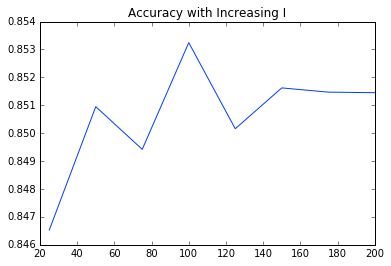

In [30]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import pylab as pl

# create Stratified k-fold cross validation iterator
cv_object = StratifiedKFold(y1, n_folds=10)

# we will fill this with predictions
y_hat = np.zeros(y1.shape)

# now iterate through and get predictions, saved to the correct row in y_hat
results = []
for i in range(25, 201, 25):
    mlr_clf = LogisticRegression(solver='lbfgs', max_iter=i, random_state=None, multi_class='multinomial')
    for train, test in cv_object:
        mlr_clf.fit(X1[train], y1[train])
        y_hat[test] = mlr_clf.predict(X1[test])
    accuracy = mt.accuracy_score(y1, y_hat)
    print "Max Iterations: %d, Accuracy: %3f" % (i, accuracy)
    results.append([i, accuracy])
results = pd.DataFrame(results, columns=["i", "accuracy"])
pl.plot(results.i, results.accuracy)
pl.title("Accuracy with Increasing I")
pl.show()

In [31]:
# take a timestamp at the beginning of the MLR process
t1 = time.clock()

# create Stratified k-fold cross validation iterator
cv_object = StratifiedKFold(y1, n_folds=10)

# we will fill this with predictions
y_hat = np.zeros(y1.shape)

# we determined maximum iterations of 100 is best
mlr_clf = LogisticRegression(solver='lbfgs',
                             max_iter=100,
                             random_state=None,
                             multi_class='multinomial')
for train, test in cv_object:
    mlr_clf.fit(X1[train], y1[train])
    y_hat[test] = mlr_clf.predict(X1[test])

# performance reporting
print
print "Classification report for %s" % mlr_clf
print
print mt.classification_report(y1, y_hat)
print "Confusion Matrix"
print mt.confusion_matrix(y1, y_hat)
print
print "Accuracy: %.2f%%" % (mt.accuracy_score(y1, y_hat) * 100)

# take a timestamp at the end of the MLR process
t2 = time.clock()
print
print('Multinomial Logistic Regression ran in: %.2f seconds' % (t2-t1))


Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

             precision    recall  f1-score   support

          1       0.97      1.00      0.99     36979
          2       0.67      0.99      0.80     36986
          3       0.80      0.63      0.71      1914
          4       0.99      0.99      0.99     45195
          5       0.92      1.00      0.95      8457
          6       0.53      0.12      0.20     11582
          7       0.00      0.00      0.00      6251
          8       0.00      0.00      0.00      2355
          9       0.00      0.00      0.00      1218
         10       0.18      0.10      0.13       738

avg / total       0.80      0.85      0.81    151675

Confusion Matrix


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[36875     0    93     9     0     0     0     0     0     2]
 [   44 36742     0     0     0   199     1     0     0     0]
 [  685     0  1207    13     0     0     0     0     0     9]
 [  147     0    59 44687     0     0     0     0     0   302]
 [    3    25     0     0  8429     0     0     0     0     0]
 [   47  9838    51     0   240  1405     1     0     0     0]
 [   63  5078    46     0   407   657     0     0     0     0]
 [   19  1979    14     0   106   237     0     0     0     0]
 [    2  1043     3     0    23   147     0     0     0     0]
 [    1     0    33   633     0     0     0     0     0    71]]

Accuracy: 85.32%

Multinomial Logistic Regression ran in: 288.96 seconds


For Multinomial Logistic Regression model (task 2), we were able to achieve an overall accuracy of 85%. The most important factor, however, is we have an average precision of 80% and average recall of 85%. This indicates to us that our model can determine whether a loan will remain in good standing with a fair amount of accuracy and also not allowing unqualified borrowers to get a loan. This protects the risk and downside of the business as this means that we are giving loans to the borrowers that will most likely remain in a good standing. We expected the accuracy results to be lower than task 1 since we derive this multinomial classfication from the same attribute [loan_status]. We note from the confusion matrix that the precision and recall are at 0% for classifiers 7, 8, and 9. This is due to the fact that the sub categories of bad loan status for 7, 8, and 9 are relatively low (imbalanced data). We expect with higher accuracy, and hence less misclassification, we should see a higher precision and recall in these categories.

#### Task 2: Support Vector Machine Classification

- Adjusting the Cost to 1.0 resulted in the most accurate model at 85%. However, this was not significantly better than varying the Cost between 0.01 and 10. The time utilized for training and fitting the data increased substantially as we increased the Cost factor from 0.01 to 10. 

In [32]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# take a timestamp at the beginning of the SVM process
t1 = time.clock()

num_cv_iterations = 3
num_instances = len(y1)

cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         train_size = 0.01,
                         test_size = 0.1)

# we will fill this with predictions
y_hat = np.zeros(y1.shape)

for train, test in cv_object: 
    X_train = X1[train]
    y_train = y1[train]
    X_test = X1[test]
    y_test = y1[test]

# train the model
svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_clf.fit(X_train, y_train)

# get the test set predictions
y_hat = svm_clf.predict(X_test)

# performance reporting
print
print "Classification report for %s" % svm_clf
print
print mt.classification_report(y_test, y_hat)
print "Confusion Matrix"
print mt.confusion_matrix(y_test, y_hat)
print
print "Accuracy: %.2f%%" % (mt.accuracy_score(y_test, y_hat) * 100)

# take a timestamp at the end of the SVM process
t2 = time.clock()
print
print('SVM ran in: %.2f seconds' % (t2-t1))


Classification report for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

             precision    recall  f1-score   support

          1       0.97      0.99      0.98      3583
          2       0.70      0.94      0.80      3725
          3       0.67      0.63      0.65       180
          4       0.99      0.98      0.99      4518
          5       0.96      1.00      0.98       868
          6       0.38      0.24      0.29      1175
          7       0.06      0.01      0.01       666
          8       0.00      0.00      0.00       265
          9       0.00      0.00      0.00       119
         10       0.16      0.12      0.14        69

avg / total       0.79      0.84      0.81     15168

Confusion Matrix
[[3538    0   42    1    0    0    0    0    0    2]
 [   6 3508    0    1    0  189    1

For Support Vector Machine model (task 2), we were able to achieve an overall accuracy of 85%. The most important factor, however, is we have an average precision of 81% and average recall of 85%. This indicates to us that our model can determine whether a loan will remain in good standing with a fair amount of accuracy and also not allowing unqualified borrowers to get a loan. This protects the risk and downside of the business as this means that we are giving loans to the borrowers that will most likely remain in a good standing. We expected the accuracy results to be lower than task 1 since we derive this multinomial classfication from the same attribute [loan_status]. We note from the confusion matrix that the precision and recall are at 0% for classifiers 7, 8, and 9. This is due to the fact that the sub categories of bad loan status for 7, 8, and 9 are relatively low (imbalanced data). We expect with higher accuracy, and hence less misclassification, we should see a higher precision and recall in these categories.

### <u>Advantages/Disadvantages of Each Model</u>

In general, we used the accuracy model to compare between each model. Mainly, we used the total number of True Positives and True Negatives in comparison to the total number of False Positives and False Negatives. This helped us determine the viability of the model.

#### K-Nearest Neighbor Classification
• Robust to noise and simple.  
• Accuracy is usually high.      
• Need to determine optimum value of parameter k, the number of nearest neighbor.  
• When the data is large, it is computationally expensive to find optimum k.   
• Performance model is depending on the number of dimensions. The more dimensions the more data samples to approximate a hypothesis.  
• KNN is a black box approach. It is difficult to acquired knowledge regarding the attributes in a comprehensible way.  

#### Logistic Regression
• Robust to noise, generally can avoid overfitting.  
• In general, logistic regression performs well as long as features are roughly linear. Looking at the number of false positives and false negatives in our confusion matrix, we suspect our data posseses non-linear qualities.   
• Easy to interpret.  
• Requires a lot of features for the model to perform well.  

#### Support Vector Classification
• Most computationally inefficent of all models we tried, had to limit the training data to 1% of data set.  
• Accuracy was as good as other models at 94%.  
• Highly accurate for non-linear features.  
• Robust against overfitting.  
• No distribution requirement.   
• Hard to interpret.  

#### Decision Tree Classification
• Decision tree is logical and easy to understand.  
• Able to handle both numerical and categorical data.  
• Able to handle multi-output problems.   
• Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.  
• Decision-tree learners can create over-complex trees (overfitting) that do not generalize the data well.   
• Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.  
• Decision tree created from training set create biased trees if some classes dominate. It is recommended to balance the dataset prior to fitting with decision tree.  

### <u>Deployment</u>

We followed the CRISP-DM process model to set business objectives and standard expectations of the predictive model deployment. The following parties are required from beginning to end in order to have a successful deployment:  

<b><i>1. Stakeholder</i></b>, to set reasonable expectations of the model.  
<b><i>2. Data Mining Modeler/Data Scientist</i></b>, to analyze and formulate proper techniques for model given certain datasets.  
<b><i>3. Business Subject Matter of Expert</i></b>, to assist the modeler and to ensure the business goals are going to be achieved upon deployment of the model.  

The following steps are technical development and implementation cycle of the model:  
<b><i>1. Data preparation</i></b> (in Lab/Sandbox):
- Sample data collection or extraction. For this particular analysis, internal data collection by LendingClub company should be the authoritative source of data.  Additionally, personal data of the borrower such as credit rating and monetary prime rate would be beneficial.      
- Extract Transform Load (Data Munging).    
- Upload data (memory or database).      
        
<b><i>2. Modeling</i></b> (in Lab/Sandbox):  
- Select appropriate model.    
- Score the model.   
- Integrate with reporting (can be integrated with 3rd party reporting tools).  
- Integrate with application (can be integrated with data mining tools, database or embedded into high-level language such as PMML, Python or Java).  
    
<b><i>3. Evaluation</i></b> (in Lab/Sandbox):    
- Assessment of data mining results in relation to business criteria. A periodical assessment needs to take place to anticipate changing in the dataset characteristics and trends.  
- Review deployment process.     
- Possible update and improvement.   
    
<b><i>4. Deployment</i></b> (in Production):      
- Implementation to production site involving current and incoming datasets.  
- Data mining model performance monitoring.   
- Update and maintenance.  
- Provide feedback for future improvement.  
- Reporting and presentation to stakeholders.  

### <u>Exceptional Work</u>

- We ran PCA manually using Python, and determined important features from the Principal Components. By using this approach, we can actually determine the actual attributes in comparison to scikit-learn PCA.  
- We were able to plot the variance explanation and the cumulative variance of the Principal Components, similar to a Scree plot.
- We used a iterative approach to optimize our models, and graphed the results.